<a href="https://colab.research.google.com/github/SamahAliIriqat/Adult-Income/blob/main/Project2_Part3_SAMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',800)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Exception ignored in: <function _xla_gc_callback at 0x79a0d84240d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
def overView(df):
  for key in df:
    print(f"Value Counts for '{key}'")
    print('*'*30)


    print(f"Value unique = {round((df[key].nunique()/len(df)*100),2)}%")
    print('*'*30)


    print('\n')
    print('/'*40)

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',800)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load Data
# The original path might be incorrect.
# Make sure the file 'adult.csv' exists in the specified location.
# If running in Google Colab, you might need to mount your Google Drive first
# using the following code:
from google.colab import drive
drive.mount('/content/drive')

# Then, use the correct path to the file:
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/project2/adult.csv')
df.info()
df.head()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.duplicated().sum()

52

In [ ]:
df.isna().sum().head(50)

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
col_na_bool = df.isna().any()
col_na = df.columns[col_na_bool]

In [ ]:
col_na

Index([], dtype='object')

In [ ]:
df[col_na]

""
0
1
2
3
4
...
48837
48838
48839
48840


In [ ]:
df[col_na].isna().sum()

,0


In [ ]:
df[col_na].dtypes

,0


In [ ]:
overView(df)

Value Counts for 'age'
******************************
Value unique = 0.15%
******************************


////////////////////////////////////////
Value Counts for 'workclass'
******************************
Value unique = 0.02%
******************************


////////////////////////////////////////
Value Counts for 'fnlwgt'
******************************
Value unique = 58.4%
******************************


////////////////////////////////////////
Value Counts for 'education'
******************************
Value unique = 0.03%
******************************


////////////////////////////////////////
Value Counts for 'educational-num'
******************************
Value unique = 0.03%
******************************


////////////////////////////////////////
Value Counts for 'marital-status'
******************************
Value unique = 0.01%
******************************


////////////////////////////////////////
Value Counts for 'occupation'
******************************
Value u

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

# Check if the 'income' column exists in the DataFrame
print(df.columns)

# If the column name is different (e.g., 'Income'), update the target variable
# The original code had target = 'Income' which is incorrect based on Global Variables
target = 'income'  # Replace 'income' with the actual column name if different

# If the column is missing, handle it appropriately (e.g., data loading error)
if target not in df.columns:
    raise ValueError(f"The target column '{target}' is not found in the DataFrame. Please check your data.")

y = df[target]
X = df.drop([target] , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


num_selector = make_column_selector(dtype_include='number')


num_imputer1 = SimpleImputer(strategy='mean')

scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer1, scaler)


num_tuple = ('numeric',num_pipe, num_selector)


ohe_cols = X_train.select_dtypes('object').columns


freq_imputer = SimpleImputer(strategy='constant', fill_value='NA')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_tuple = ('categorical',cat_pipe, ohe_cols)


all_tuple = [num_tuple, cat_tuple]

preprocessor = ColumnTransformer(all_tuple, verbose_feature_names_out=False)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
# Transform the training data
X_train_tf = preprocessor.fit_transform(X_train)
# Transform the testing data
X_test_tf = preprocessor.transform(X_test)
# View the processed training data
X_train_tf.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3779,-0.338227,0.671222,1.136866,-0.144508,-0.220251,0.770196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10522,1.264622,1.696220,1.525955,-0.144508,-0.220251,-0.034711,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# Define shape
input_shape = X_train_tf.shape[1]
input_shape

108

In [ ]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'adam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

    return model



In [ ]:
# Call our build function to build model
reg_model = build_model()

# Get model summary
reg_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           1,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,211 (4.73 KB)

 Trainable params: 1,211 (4.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)



In [ ]:
# Assuming you want to convert the specified columns to integers
columns_to_convert = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Ensure all these columns are present in your DataFrame
for col in columns_to_convert:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' does not exist in the DataFrame.")

# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Convert the columns using Label Encoding
for col in columns_to_convert:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

target = 'income'
y = df[target]
X = df.drop([target] , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


num_selector = make_column_selector(dtype_include='number')


num_imputer1 = SimpleImputer(strategy='mean')

scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer1, scaler)


num_tuple = ('numeric',num_pipe, num_selector)


ohe_cols = X_train.select_dtypes('object').columns


freq_imputer = SimpleImputer(strategy='constant', fill_value='NA')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_tuple = ('categorical',cat_pipe, ohe_cols)


all_tuple = [num_tuple, cat_tuple]

preprocessor = ColumnTransformer(all_tuple, verbose_feature_names_out=False)



In [ ]:
# Transform the training data
X_train_tf = preprocessor.fit_transform(X_train)
# Transform the testing data
X_test_tf = preprocessor.transform(X_test)
# View the processed training data
X_train_tf.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
27859,0.171771,-2.640455,-1.538807,-0.592974,0.358689,-0.407986,-1.554437,-0.896982,0.389962,0.704141,-0.144508,5.711885,-2.288453,0.288765
5654,0.026057,0.090720,1.225138,-0.334962,1.136866,-0.407986,-0.135151,2.226042,-3.155215,-1.420170,-0.144508,-0.220251,-0.276184,-0.874933
3779,-0.338227,0.090720,0.671222,-0.334962,1.136866,-0.407986,-0.608246,-0.896982,0.389962,0.704141,-0.144508,-0.220251,0.770196,0.288765
10522,1.264622,1.456307,1.696220,0.439073,1.525955,-0.407986,1.284135,-0.896982,0.389962,0.704141,-0.144508,-0.220251,-0.034711,0.288765
22461,2.357474,1.456307,-0.249891,0.955096,1.915044,-0.407986,-0.371698,-0.896982,0.389962,0.704141,-0.144508,-0.220251,-3.093361,0.288765


In [ ]:
# Define shape
input_shape = X_train_tf.shape[1]
input_shape

14

In [ ]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'adam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

    return model



In [ ]:
# Call our build function to build model
reg_model = build_model()

# Get model summary
reg_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)



In [ ]:
# Assuming you want to convert the specified columns to integers
columns_to_convert = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Ensure all these columns are present in your DataFrame
for col in columns_to_convert:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' does not exist in the DataFrame.")

# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Convert the columns using Label Encoding
for col in columns_to_convert:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
# Assuming you want to convert the specified columns to integers
columns_to_convert = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Ensure all these columns are present in your DataFrame
for col in columns_to_convert:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' does not exist in the DataFrame.")

# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Convert the columns using Label Encoding
for col in columns_to_convert:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    # Explicitly convert the encoded column to float
    df[col] = df[col].astype(float) # This line is added to ensure that the columns are of type float

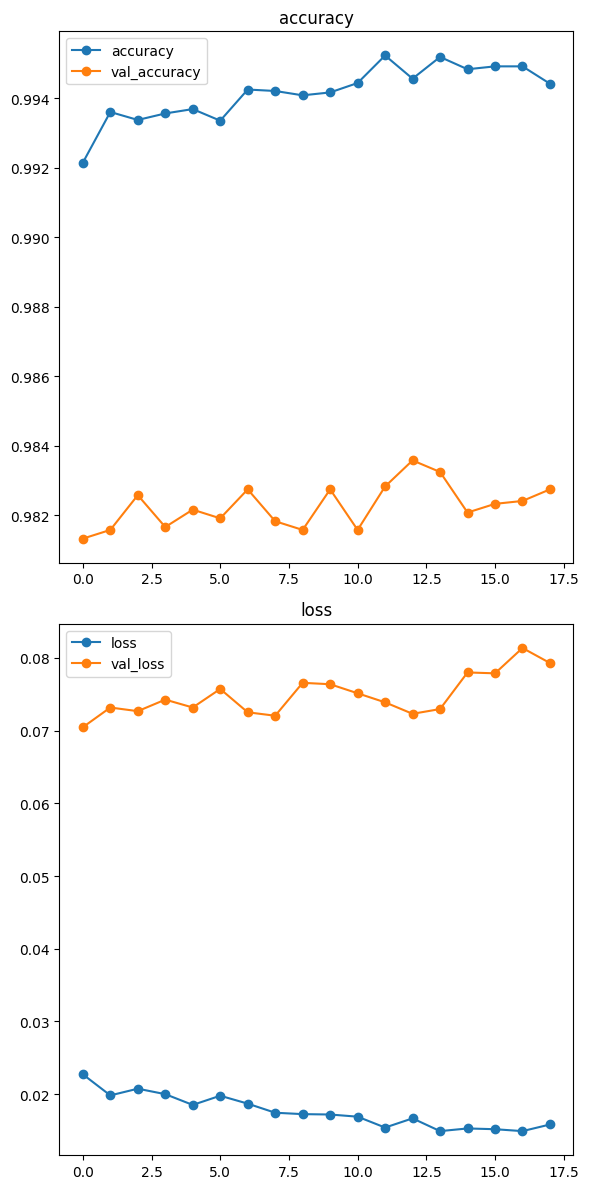

In [ ]:
# plot learning history
plot_history(history);

In [ ]:
# make predictions
y_pred_test = clf_model.predict(X_test_tf)
y_pred_test[:5]

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 0.139999  ],
       [-0.33787134],
       [-0.07713422],
       [-0.185826  ],
       [ 0.11655546]], dtype=float32)

In [ ]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[ 0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.74      0.86      0.80      9354
         1.0       0.22      0.02      0.04      2857
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66     12211
   macro avg       0.19      0.18      0.17     12211
weighted avg       0.62      0.66      0.62     12211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.74      0.86      0.80      9354
         1.0       0.22      0.02      0.04      2857
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66     12211
   macro avg       0.19      0.18      0.17     12211
weighted avg       0.62      0.66      0.62     12211



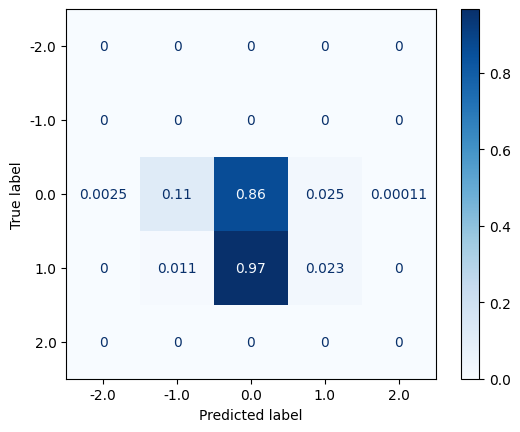

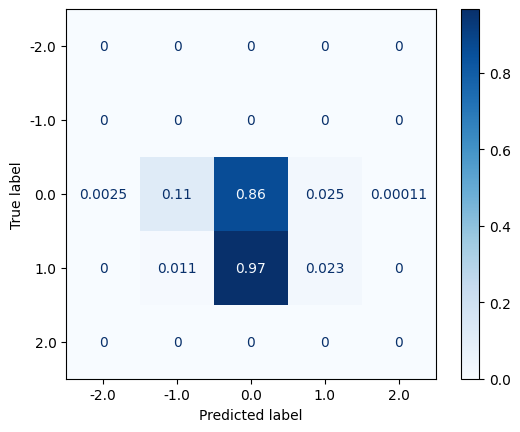

In [ ]:
# Ensure y_test and y_pred_test have the same data type (numerical).
# Convert y_test to numerical labels if necessary.

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Assuming y_test has string labels like '<=50K', '>50K', etc.
# Create a mapping to convert them to integers:
label_mapping = {'<=50K': 0, '>50K': 1}  # Replace with your actual labels
y_test = y_test.map(label_mapping)

# Now, generate the classification report
print(classification_report(y_test, y_pred_test))

# Generate the confusion matrix display
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test, cmap="Blues", normalize="true"
)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

In [ ]:
# Build and Compile Model within a function
def build_model():
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model

In [ ]:
# Call our build function to build model
basic_model = build_model()

# Get model summary
basic_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 19)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496 (1.94 KB)

 Trainable params: 496 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [ ]:
# Build and Compile Model within a function to try optimizers
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [ ]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning

In [ ]:
# Run the tuner
epochs = 50
tuner.search(x_train, y_train,  epochs=epochs,
             validation_data = (x_val, y_val), callbacks = [early_stop])

In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 224,
 'dropout': 0.4,
 'optimizer': 'adam',
 'learning_rate': 0.00032957797468860164,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0078'}

In [ ]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │         175,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,090 (695.66 KB)

 Trainable params: 178,090 (695.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install keras-tuner # Install the keras-tuner package

import tensorflow as tf
import numpy as np
import pandas as pd # Import pandas for handling dataframes
from keras_tuner import HyperParameters as hp # Now you should be able to import this
import keras_tuner as kt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import LabelEncoder # Make sure this is imported

# Assume you have your dataset loaded into 'X' and 'y'
# Split data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into train and test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # Split train into train and validation

# Before calling tuner.search, encode categorical features in your dataset, including target variable
# Apply Label Encoding to object type columns in x_train, x_val, and x_test
for df in [x_train, x_val, x_test]:
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        # Fit on the combined data for that column to ensure all categories are seen
        le.fit(pd.concat([x_train[column], x_val[column], x_test[column]]))
        df[column] = le.transform(df[column]).astype(np.float32)

# Apply Label Encoding to target variables y_train, y_val, and y_test
le_y = LabelEncoder()
le_y.fit(pd.concat([y_train, y_val, y_test]))  # Fit on all target data
y_train = le_y.transform(y_train).astype(np.float32)
y_val = le_y.transform(y_val).astype(np.float32)
y_test = le_y.transform(y_test).astype(np.float32)

# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

# Assuming build_model is defined elsewhere in your code
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     directory=folder,
                     overwrite=True,
                     seed=42,
                     project_name='Rookie_tuning')

# Run the tuner
epochs = 50
tuner.search(x_train, y_train, epochs=epochs,
             validation_data=(x_val, y_val), callbacks=[early_stop])

# Obtain best hyperparameter values
best_hps = tuner.get_best_hyperparameters()[0]  # This will now have results after the search
best_hps.values

# Obtain best model
best_model = tuner.get_best_models()[0]  # This will now have results after the search
best_model.summary()

# Now evaluate the model
num_samples = min(x_test.shape[0], y_test.shape[0])

# Slice both arrays to have the same number of samples
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]

result = best_model.evaluate(x_test, y_test, return_dict=True)
result

Trial 3 Complete [00h 00m 10s]
val_accuracy: 0.7634037137031555

Best val_accuracy So Far: 0.7634037137031555
Total elapsed time: 00h 00m 26s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496 (1.94 KB)

 Trainable params: 496 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7714 - loss: 0.5800 - precision: 0.9219 - recall: 0.0466


{'accuracy': 0.7754120230674744,
 'loss': 0.5969157218933105,
 'precision': 0.9137930870056152,
 'recall': 0.04628821089863777}

In [ ]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in my_dir/mnist_tuning
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 0082 summary
Hyperparameters:
units: 224
dropout: 0.4
optimizer: adam
learning_rate: 0.00032957797468860164
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0078
Score: 0.9825000166893005

Trial 0049 summary
Hyperparameters:
units: 160
dropout: 0.05
optimizer: adam
learning_rate: 0.002239006640789775
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.9816666841506958

Trial 0083 summary
Hyperparameters:
units: 192
dropout: 0.30000000000000004
optimizer: adam
learning_rate: 0.00024060665718749996
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0075
Score: 0.981249988079071

Trial 0078 summary
Hyperparameters:
units: 224
dropout: 0.4
optimizer: adam
learning_rate: 0.00032957797468860164
tuner/epochs: 17
tuner/initial_epoch: 0
tuner/brac